<a href="https://colab.research.google.com/github/PoritonEE/Lomdot/blob/main/content/assignments/assignment_1_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 - Linear Least Squares (LLS)

## Intro

The hands-on assignments (תרגילים רטובים) in this course will be given in python using a free online platform provided by google called Colab. If you need an introduction to this platform please go over assignment 0.

### Making your own copy of the notebook

Start by making your own copy of this notebook by pressing the "Copy to drive" button at the top area of the this page.  Make sure that the logo at the top of the page changes to Google's drive icon: ![](https://ssl.gstatic.com/images/branding/product/1x/drive_2020q4_32dp.png)

### Expending all cells

When you open a new notebook some sections might be hidden (collapsed), showing only the title of the section with a "↳ # cells hidden" note beneath it. Before you start, make show you expand all the sections. You can do so by pressing **Ctrl+[** or by clicking on all the "↳ # cells hidden" lines.

### ✍️ Your assignments

In these assignments, you will have to follow the instruction in the notebooks and fill in the missing code blocks according to the instructions. The cells containing the instructions will be marked with ✍️. The line of code which you will be expected to fill in will be surrounded by the two following comments:


``` python
## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%

## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%
```

After filling in all the missing code you will have to download the note book and submit it through the Moodle page. The instructions for downloading the notebook appear at the end of this notebook.

### Your IDs

✍️ Fill in your IDs in the cell below:

In [ ]:
## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
## Fill in your IDs (as a string)
student1_id = '208783100'
student2_id = '208668061'
## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

print('Hello ' + student1_id + ' & ' + student2_id)

Hello 012345678 & 012345678


### Importing Packages

We will start by importing the packages which we will be using in this assignment.

In [5]:
import numpy as np  # Numerical package (mainly multi-dimensional arrays and linear algebra)
import pandas as pd  # A package for working with data frames
import matplotlib.pyplot as plt  # A plotting package

## Setup matplotlib to output figures into the notebook
%matplotlib inline

## Set some default values of the the matplotlib plots
plt.rcParams['figure.figsize'] = (6.0, 6.0)  # Set default plot's sizes
plt.rcParams['figure.dpi'] = 120  # Set default plot's dpi (increase fonts' size)
plt.rcParams['axes.grid'] = True  # Show grid by default in figures

## The pandas package

A great and very popular package for working with dataset in Python is the [pandas package](https://pandas.pydata.org/), which we have imported in the above code cell.

The main type of object in pandas is the *DataFrame*. The data frame is basically 2D Mumpy arrays with extended capabilities such as:

- The ability to give names to columns \ rows.
- Advance manipulation such as: grouping, querying etc. handing missing data.
- Predefined plotting function.
- Nice integration with notebooks (such as this one) viewing the array as a nice table

In this course we will mostly be using this package to load our dataset and then extract the relevant data form them as a Numpy array.

If you are interested in learning more about pandas you can look at the [10 minutes to pandas](https://pandas.pydata.org/docs/user_guide/10min.html) page or go through the [full official tutorial](https://pandas.pydata.org/docs/getting_started/index.html)

As a very short introduction to working with pandas DataFrames we will give a few quick examples.

(**Reminder**: when running a cell, the output of the last line in the cell is presented below the cell as the output of the cell)

1. The following code wraps a 5 by 5 random array (with integers between 0 and 10) with a DataFrame

In [6]:
df = pd.DataFrame(np.random.randint(0, 10, (5, 5)))
df

,0,1,2,3,4
0,6,6,9,9,8
1,2,1,8,8,7
2,3,5,4,9,7
3,6,2,1,2,1
4,9,7,5,9,2


2. We can also give each column a name:

In [7]:
df = pd.DataFrame(np.random.randint(0, 10, (5, 5)), columns=['field 1', 'field 2', 'field 3', 'field 4', 'field 5'])
df

,field 1,field 2,field 3,field 4,field 5
0,5,8,2,8,8
1,1,8,4,9,4
2,9,0,2,5,5
3,3,0,1,5,1
4,4,3,4,5,0


3. To extract a specific columns we can address it by it's name:

In [8]:
print('The column of "field 3" is:')
df['field 3']

The column of "field 3" is:


,field 3
0,2
1,4
2,2
3,1
4,4


4. To convert a column / DataFrame to a Numpy array we can use the ".value" attribute:

In [9]:
df['field 3'].values

array([2, 4, 2, 1, 4])

## Seoul Bike Sharing Demand Dataset

In this assignment we will be looking at the data from an automatic bike rental service (similar to "תל-אופן") which operates in the city of Seoul. The dataset which we will be working with has been collected for every hour of the day over a period of one year. For each hour the dataset contains the number of bikes rented along with a few weather indicator such as the temperature, the wind speed and the amount of rain.

In this assignment we will try to predict the number of the bikes which are going to be rented based on the day of the week, the hour of the data and the weather. We shall use RMSE cost as our cost function.

This dataset has been made available by the [UCI's (University of California, Irvine) Center for Machine Learning and Intelligent Systems](http://archive.ics.uci.edu/ml/index.php). The project's official site along with the dataset can be found [here](http://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand).

We will work with a slightly modified version of this dataset, which can be found [here](https://technion046195.github.io/semester_2019_spring/datasets/bike_demand.csv).

### Loading the dataset

We shall start by loading the dataset. The dataset is stored as an [CSV file](https://en.wikipedia.org/wiki/Comma-separated_values). The "read_csv" function in the pandas package reads a CSV file into a DataFrame (even for a remote location on the web)

In [10]:
dataset_location = 'https://technion046195.netlify.app/datasets/bike_demand.csv'

## Loading the data
dataset = pd.read_csv(dataset_location)

Lets look at the dataset:

In [11]:
dataset

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Day of the week
0,01/12/2017,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,4
1,01/12/2017,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,4
2,01/12/2017,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,4
3,01/12/2017,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,4
4,01/12/2017,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...
8052,30/11/2018,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0,4
8053,30/11/2018,764,20,3.4,37,2.3,2000,0.0,0.0,0.0,4
8054,30/11/2018,694,21,2.6,39,0.3,1968,0.0,0.0,0.0,4
8055,30/11/2018,712,22,2.1,41,1.0,1859,0.0,0.0,0.0,4


The column of "Rented Bike Count" will be our labels ($\text{y}$) all the rest except for the "Date" will be our measurements ($\mathbf{x}$).

**Think**: Why would learning to make predictions based on the date be a bad thing?

✍️ Complete the code in order to create a list named "x_field", which contain the name of the fields which we would like to use as the measurements:

In [13]:
y_field = 'Rented Bike Count'
## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
## Fill in the name of the relevant fields.
x_fields = ['Hour', 'Temperature(°C)', 'Wind speed (m/s)' , 'Visibility (10m)' , 'Rainfall(mm)' , 'Snowfall (cm)' ]
## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

### Plotting the $\text{y}$ vs. each one of the fields

In order to get a fell of the data (values ranges, distribution across the range, etc.) let's create a plot for the values in each field with the matching values of $\text{y}$:

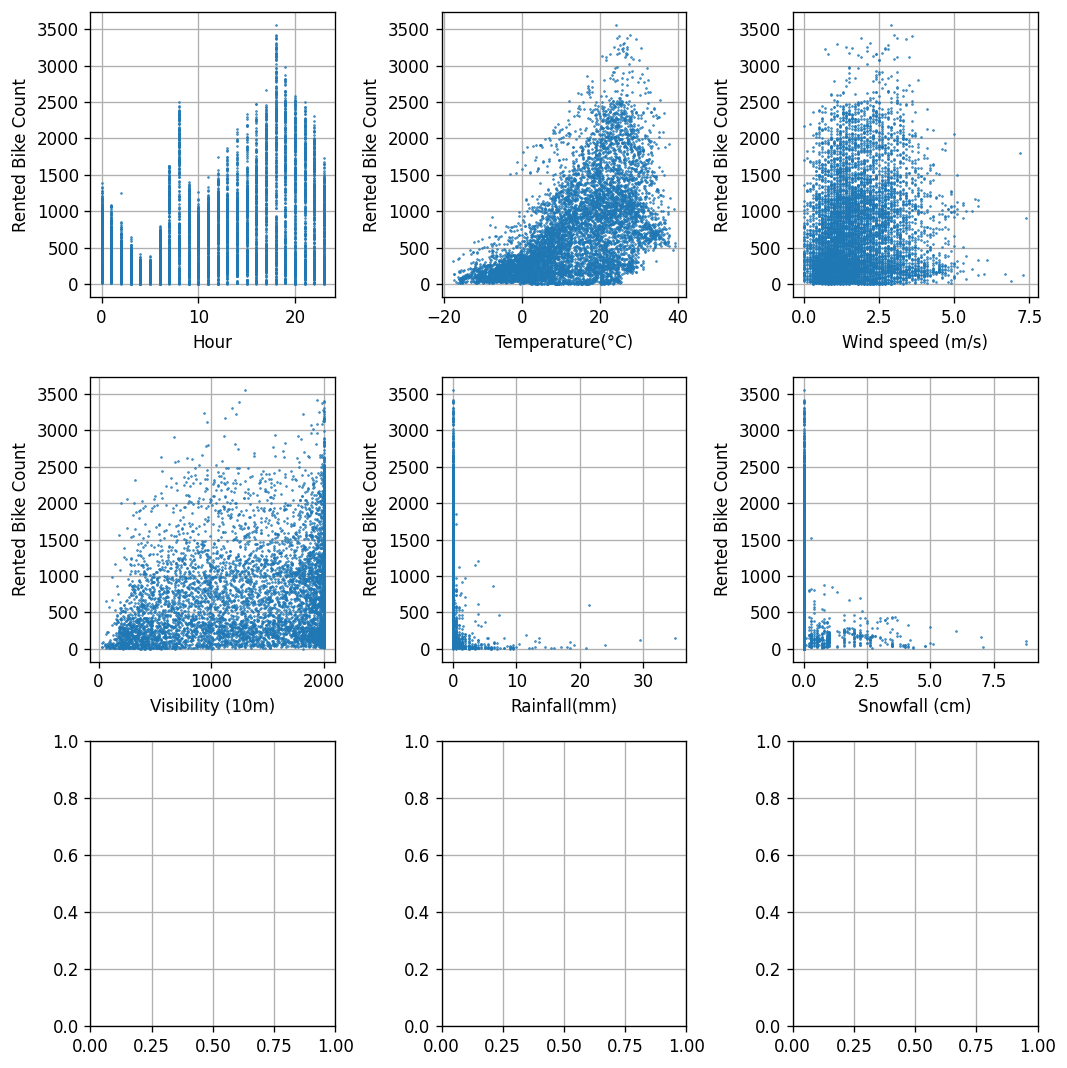

In [14]:
fig, axes = plt.subplots(3, 3, figsize=(9, 9))  # Create a figure with 3 over 3 axes
axes = axes.flatten()  # Convert the object storing the axes for a 3 by 3 array into a 1D array of lenth 9.

for i_field, field in enumerate(x_fields):
    ax = axes[i_field]
    ax.plot(dataset[field].values, dataset['Rented Bike Count'].values, '.', markersize=1)
    ax.set_xlabel(field)
    ax.set_ylabel('Rented Bike Count')
fig.tight_layout()

## Train-test split

Before we start building our model we shall first divide the dataset into 80% train and 20% train.

**Note**: we will use the name train_full to indicate the train set before splitting it into train and validation.

In [16]:
n_samples = len(dataset)  # The total number of samples in the dataset

## Generate a random generator with a fixed seed
rand_gen = np.random.RandomState(0)

## Generating a shuffled vector of indices
indices = np.arange(n_samples)
rand_gen.shuffle(indices)

## Split the indices into 80% train (full) / 20% test
n_samples_train_full = int(n_samples * 0.8)
train_full_indices = indices[:n_samples_train_full]
test_indices = indices[n_samples_train_full:]

## Extract the sub datasets from the full dataset using the calculated indices
train_full_set = dataset.iloc[train_full_indices]
test_set = dataset.iloc[test_indices]

## Train - validation split

Since we plan to test different configuration of building our model we would like to further split the train set into 75% train and 25% validation set. (which will result in a 60%-20%-20% over all split).

✍️ Complete the following code to create a train-validation split similar to the train-test split above:

In [17]:
## Generate a random generator with a fixed (different) seed
rand_gen = np.random.RandomState(1)

## Generating a shuffled vector of indices
indices = train_full_indices.copy()
rand_gen.shuffle(indices)

## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
## Split the indices of the train (full) dataset into 75% train / 25% validation
n_samples_train = int(n_samples_train_full * 0.75)
train_indices = indices[:n_samples_train]
val_indices = indices[n_samples_train:]
## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

## Extract the sub datasets from the full dataset using the calculated indices
train_set = dataset.iloc[train_indices]
val_set = dataset.iloc[val_indices]

## Training an LLS model based on a single field

As a warm up, we shall start with building a linear predictor using only the temperature field for the dataset. In other words we would like to use the following parametric model:

$$
\hat{y}=h_{\boldsymbol{\theta}}(\boldsymbol{x})=\theta_1+\theta_2 x_{\text{temperature}}
$$

### Building the $X$ matrix and the $\boldsymbol{y}$ vector

Since we would like our model to also have a bias term, we would like to construct an $X$ matrix with a column containing the temperature field and a column containing ones.

The following code constructs the $X$ matrix and the $\boldsymbol{y}$ vector:

In [ ]:
## Create a list of all the features we would like X to contain
features = []
features.append(np.ones(len(dataset)))
features.append(dataset['Temperature(°C)'].values)

## Stack all the features side by side to create X
x_train = np.stack(features, axis=1)

## Extract the y vector form the dataset
y_train = train_set[y_field].values

Printing first 10 samples in $X$ and $\boldsymbol{y}$:

In [ ]:
print('The X matrix:')
print(x_train[:10])
print('\nThe y vector:')
print(y_train[:10])

#### Putting it in a function

Here we have constructed $X$ and $\boldsymbol{y}$ for the train set. Since we would later like to repeat the process for the validation and the test set as well it would be better if we would create a function which receives a dataset (a DataFrame) and extracts $X$ and $\boldsymbol{y}$.

✍️ Complete the following code to create this function:

In [ ]:
def extract_x_y(dataset):
    ## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
    ## make sure the you use dataset here and not train_set
    features = []
    ...
    x = ...
    y = ...
    ## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%
    return x, y

x_train, y_train = extract_x_y(train_set)

### Calculating the model's parameters

✍️ Use *x_train* and *y_train* to calculate the optimal parameters $\boldsymbol{\theta}$ as we learned in class.

Useful Numpy functions:

- *A.T* calculates the transpose of A.
-  *A@B* performs a matrix multiplication between A and B.
- np.linalg.inv(A) calculates the inverse matrix of A

In [ ]:
## Calcualting theta
## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
theta = ...
## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%
print(theta)

### Using a more numerical efficient calculation

The equation we have showed in class for calculating $\boldsymbol{\theta}$ from $X$ and $\boldsymbol{y}$ is mathematically correct but it is not the most efficient and numerically stable way to to find the optimal $\boldsymbol{\theta}$ minimizing $\lVert X\boldsymbol{\theta}-\boldsymbol{y}\rVert_2^2$. In general when performing numerical calculation we would prefer to avoid inverting matrices.

The Numpy function *np.linalg.lstsq* solve the least squares problem in a much more efficient and stable way. Therefore we would prefer calculating $\boldsymbol{\theta}$ in the following way:

In [ ]:
theta, _, _, _ = np.linalg.lstsq(x_train, y_train, rcond=None)
print(theta)

Make sure you got the same results in your calculation as the *np.linalg.lstsq* function.

- The *rcond=None* argument was added to suppress some error which is related to some recent changes which were made in the Numpy package.
- The *np.linalg.lstsq* function return 4 outputs (the other 3 outputs are related to the quality of the solution). The ", _, _, _" phrase which appears in the above equation tells Python to expect 4 outputs but to ignore the last 3.

The full documentation of the *np.linalg.lstsq* function can be found [here](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html)

### Making predictions

✍️ Use *theta* and *x_train* to calculate the predicted number of rents, $\hat{y}$, on the train set.

- Use the *@* operator.

In [ ]:
## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
y_hat_train = ...
## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

## Printing the predictions and the true values of the 20 first samples
print(f'Predictions: {y_hat_train[:10].astype(int)}')
print(f'Predictions: {y_train[:10]}')

### Building a class

To make building the model and making prediction simpler we shall build a class which will hold the learned model and will have two methods:

- **fit**: which will receive $X$ and $\boldsymbol{y}$ and use them to lean the optimal parameters.
- **predict** which will receive $X$ and produce $\hat{y}$.

✍️ Complete the missing line in the following code based on the prediction function you wrote above.

In [ ]:
class LLS:  # Defining a new class named LLS
    def __init__(self):  # This function is executed when the object is created
        ## Defining and initizaling the classes inner variables
        self.theta = None  # Theta will hold the learned model parameters.

    def fit(self, x, y):
        self.theta, _, _, _ = np.linalg.lstsq(x, y, rcond=None)

    def predict(self, x):
        ## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
        ## Make sure you use x here and not x_train
        y_hat = ...
        ## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%
        return y_hat

Let's use our new class for training a model and making predictions

In [ ]:
model = LLS()
model.fit(x_train, y_train)

y_hat_train = model.predict(x_train)

## Printing the predictions and the true values of the 20 first samples
print(y_hat_train[:10].astype(int))
print(y_train[:10])

Make sure you got the same results as before

### Evaluation

✍️ Complete the function bellow so it will evaluate the RMSE score for a given model (an LLS object) and a given pair of $X$ and $\boldsymbol{y}$:

- **Reminder**: the RMSE score is given by $\sqrt{\tfrac{1}{N}\sum_i (\hat{y}_i-y_i)^2}$

In [ ]:
def calc_rmse(model, x, y):
    ## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
    y_hat = model.predict(...
    rmse = ...
    ## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%
    return rmse

Lets use this function to calculate the train and the validation scores:

In [ ]:
## Calculate the model's rmse on the train set
print(f'The train score is: {calc_rmse(model, x_train, y_train):.2f}')

## Extract x_val and y_val form val_set
x_val, y_val = extract_x_y(val_set)

## Calculate the model's rmse on the validation set
print(f'The validation score is: {calc_rmse(model, x_val, y_val):.2f}')

### Using the scikit-learn package

The [scikit-learn package](https://scikit-learn.org/stable/) (which appears as sklearn in Python) is a popular Python package for applying machine-learning algorithms. The package contains almost all the algorithms which we will cover in this course.

We will use this package in many places in these assignments.

The scikit-learn package has an implementation of a [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) class which is very similar to the one we wrote. Let's try using this implementation and compare our results.

**notes**:

- We will usually only import from scikit-learn the specific class \ function we need rather then the full package. This is done using the following syntax: "from sklearn.linear_model import LinearRegression"
- The LinearRegression class added the the bias term by default, since we have already added it ourselves we will tell the class not to add it by using the "fit_intercept=False" argument when creating the model.
- We will import from scikit-learn two more classes we will need to use in the following assigments, 'make_pipeline' and 'StandarScaler'.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model = LinearRegression(fit_intercept=False)
model.fit(x_train, y_train)

print(f'The train score is: {calc_rmse(model, x_train, y_train):.2f}')
print(f'The validation score is: {calc_rmse(model, x_val, y_val):.2f}')

Make sure you got the same results as before

## Using all features

Up until now we have only used the temperature files from the dataset. We would now like to expend our model to include all features:

$$
\hat{y}=h_{\boldsymbol{\theta}}(\boldsymbol{x})
=\theta_1
+\theta_2 x_{\text{hour}}
+\theta_3 x_{\text{temperature}}
+\theta_4 x_{\text{humidity}}
+\dots
$$

✍️ Update the "extract_x_y" function so that it will produce new $X$ which has a field for each column.

- Do not add the ones column (the bias column). We will let the LinearRegression add it by itself.

In [ ]:
def extract_x_y(dataset):
    ## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
    features = []
    for field in x_fields:
        features.append(...

    x = ...
    y = ...
    ## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%
    return x, y

Let's train and evaluate the linear model using the new features.

- We have removed the "fit_intercept=False" argument so that the LinearRegression will add a bias term.
- We would like to normalize each column of $X$, making the learning process of the parameters more stable (ask yourself why?). In order to do it we will use 'make_pipeline' and 'StandardSvaler' which we alredy imported.

In [ ]:
x_train, y_train = extract_x_y(train_set)
x_val, y_val = extract_x_y(val_set)

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
model.fit(x_train, y_train)

print(f'The train score is: {calc_rmse(model, x_train, y_train):.2f}')
print(f'The validation score is: {calc_rmse(model, x_val, y_val):.2f}')

**Check**: Have the result improve? Both of them?

## Adding second order features

Now let's try to use a parametric model which is a second order polynomial of the fields in the dataset.

$$
\hat{y}=h_{\boldsymbol{\theta}}(\boldsymbol{x})
=\theta_1
+\theta_2 x_{\text{hour}}
+\theta_3 x_{\text{temperature}}
+\theta_4 x_{\text{hour}}^2
+\theta_5 x_{\text{temperature}}^2
+\theta_6 x_{\text{hour}}x_{\text{temperature}}
+\dots
$$

✍️ Update the "extract_x_y" function so that $X$ will include all the term which should appear in a second order polynomial of the features in the dataset.

In [ ]:
def extract_x_y(dataset):
    ## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
    features = []
    ## Adding first order features
    for field in x_fields:
        features.append(...
    ## Adding second order features
    for field1 in x_fields:
       for field2 in x_fields:
           features.append(...

    x = ...
    y = ...
    ## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%
    return x, y

x_train, y_train = extract_x_y(train_set)
x_val, y_val = extract_x_y(val_set)

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
model.fit(x_train, y_train)

print(f'The train score is: {calc_rmse(model, x_train, y_train):.2f}')
print(f'The validation score is: {calc_rmse(model, x_val, y_val):.2f}')

**Check**: Have the result improve? Both of them?

## Adding third order features

Now let's try to use a parametric model which is a third order polynomial of the fields in the dataset.

✍️ Update the "extract_x_y" function so that $X$ will include all the term which should appear in a third order polynomial of the features in the dataset.

In [ ]:
def extract_x_y(dataset):
    ## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
    features = []
    ## Adding first order features
    for field in x_fields:
        features.append(...
    ## Adding second order features
    for field1 in x_fields:
       for field2 in x_fields:
           features.append(...
    ## Adding third order features
    for field1 in x_fields:
        for field2 in x_fields:
            for field3 in x_fields:
                features.append(...

    x = ...
    y = ...
    ## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%
    return x, y

x_train, y_train = extract_x_y(train_set)
x_val, y_val = extract_x_y(val_set)

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
model.fit(x_train, y_train)

print(f'The train score is: {calc_rmse(model, x_train, y_train):.2f}')
print(f'The validation score is: {calc_rmse(model, x_val, y_val):.2f}')

**Check**: If you implemented every thing correctly the results here should not have improved. What happened? (you do not have to write down the answer, just make sure you know the answer)

## Ridge - $l_2$ regularization

Let's try adding an $l_2$ regularization. We can do so by simply replacing the *LinearRegression* class we have been using with the scikit-learn package of [*Ridge*](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html).

The *Ridge* class works just the same as the *LinearRegression* class except that we need to give it the an argument *alpha* which is the regularization coefficient. In our course we use $\lambda$ for this coefficient.

Just as a quick check, let's try training a model using Ridge with $\lambda=0$.

**Think**: what results do you expect to get?

In [ ]:
from sklearn.linear_model import Ridge

model = make_pipeline(StandardScaler(with_mean=False), Ridge(alpha=0))
model.fit(x_train, y_train)

print(f'The train score is: {calc_rmse(model, x_train, y_train):.2f}')
print(f'The validation score is: {calc_rmse(model, x_val, y_val):.2f}')

## Selecting $\lambda$

To select $\lambda$ we will simply try a set of values and check how well they perform on the validation set.

✍️ Complete the following code to calculate the train and validation scores for the given list of values if $\lambda$:

In [ ]:
## The list of lambdas to test
lambdas_list = [3, 1, 0.3, 0.1, 0.03, 0.01, 0.003, 0.001, 0.0003, 0.0001]

## We will use these to dictionaries to store the results for each lambda
train_scores = {}
val_scores = {}

for lambda_value in lambdas_list:
    model = make_pipeline(StandardScaler(with_mean=False), Ridge(alpha=lambda_value))

    model.fit(x_train, y_train)

    train_scores[lambda_value] = calc_rmse(model, x_train, y_train)
    val_scores[lambda_value] = calc_rmse(model, x_val, y_val)

In [ ]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.plot(list(train_scores.keys()), list(train_scores.values()), label='Train')
ax.plot(list(val_scores.keys()), list(val_scores.values()), label='Validation')
ax.set_ylabel('RMSE')
ax.set_xlabel('$\lambda$')
ax.set_title('Score vs. $\lambda$')
ax.legend();

The following code selects the $\lambda$ with the lowest validation score

In [ ]:
best_lambda = min(val_scores.keys(), key=val_scores.get)
print(f'The best lambda is: {best_lambda}, with a validation score of {val_scores[best_lambda]:.2f}')

## LASSO - $l_1$ regularization

We can also test $l_1$ regularization using the *Lasso* class in scikit-learn.

As we learned in class LASSO has no close form solution and we must use numerical methods to solve it. Scikit-learn uses an iterative algorithm called [coordinate descent](https://en.wikipedia.org/wiki/Coordinate_descent) to find the solution. The smaller $\lambda$ is the more steps it takes the algorithm to converge.

In general we would also want to test different values of $\lambda$ for LASSO as well, but since LASSO takes slightly longer to learn, we shall save you the time of running the algorithm multiple times, and we shall only test $\lambda=0.01$.

In order to make the algorithm converge we will need to increase the maximal number of iteration it can use. We will do so using the *max_iter* argument:

(Running his cell can take about **20 min**).

In [ ]:
from sklearn.linear_model import Lasso

model = make_pipeline(StandardScaler(with_mean=False), Lasso(alpha=0.01, max_iter=100000))
model.fit(x_train, y_train)

print(f'The train score is: {calc_rmse(model, x_train, y_train):.2f}')
print(f'The validation score is: {calc_rmse(model, x_val, y_val):.2f}')

## Retraining using the full train set

✍️ In order to produce the final model select the method which gave the best score on the validation set and train a model using this method and the train_full_set.

In [ ]:
## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
x_train_full, y_train_full = ...

model = ...
model.fit(....
## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

## Final evaluation

Evaluate the model using the test set

In [ ]:
## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
...
print(f'The validation score is: {...
## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

## Submission

To submit your code download it as a **ipynb** file from Colab, and upload it to the course's website (Moodle). You can download this code by selecting **Download .ipynb** from the **file** menu.